# ML Zoomcamp 2023 &ndash; Midterm Project

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data set can be retrieved from the UCI Machine Learning Repository at the link below.

* [Estimation of obesity levels based on eating habits and physical condition &ndash; UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

The research article contains a description of the features on data set.
* [Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico](https://www.sciencedirect.com/science/article/pii/S2352340919306985)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Table of acronyms


| Acronym |               Description                 |                            Values                               |
| ------- | ----------------------------------------- | --------------------------------------------------------------- |
|  FAVC   | Frequent consumption of high caloric food |                    Yes / No                                     |
|  FCVC   | Frequency of consumption of vegetables    |           Never / Sometimes / Always                            |
|   NCP   | Number of main meals                      |       Between 1 and 2 / 3 / More than 3                         |
|  CAEC   | Consumption of food between meals         |   No / Sometimes / Frequently / Always                          |
|  CH20   | Consumption of water daily                |      Less than 1 L / Between 1 and 2 L / More than 2 L          |
|  CALC   | Consumption of alcohol                    |      Don't drink / Sometimes / Frequently / Always              |
|   SCC   | Calories consumption monitoring           |                   Yes / No                                      |
|   FAF   | Physical activity frequency               |     I do not have / 1 or 2 days / 2 or 4 days / 4 or 5 days     |
|   TUE   | Time using technology devices             |                   0–2 hours / 3–5 hours / > 5 hours             |
| MTRANS  | Transportation used                       | Automobile / Motorbike / Bike / Public Transportation / Walking |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Exploratory data analysis

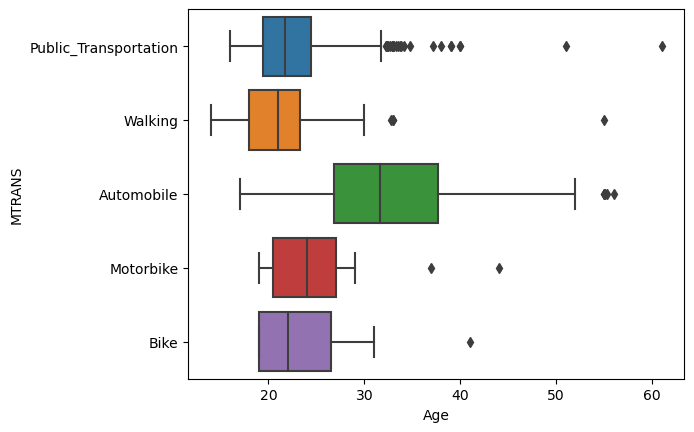

In [26]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.boxplot(x='Age', y='MTRANS', data=df)

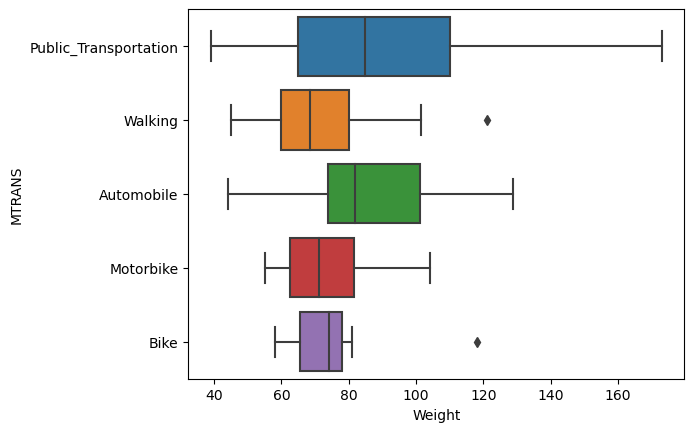

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.boxplot(y='MTRANS', x='Weight', data=df)

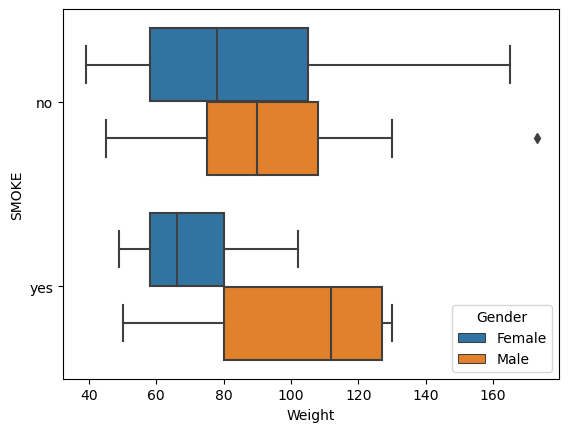

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.boxplot(x='Weight', y='SMOKE', hue='Gender', data=df)

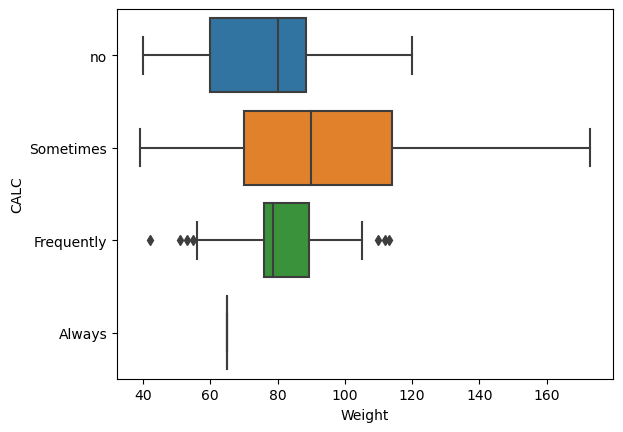

In [32]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.boxplot(x='Weight', y='CALC', data=df)

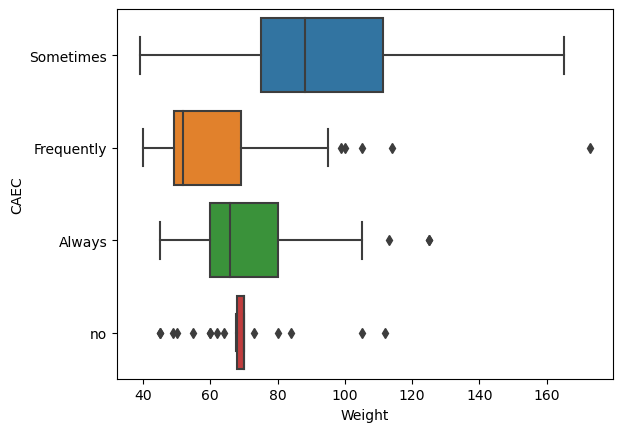

In [39]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.boxplot(x='Weight', y='CAEC', data=df)